<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [6]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [ ]:
TASK2

In [ ]:
a)For the "Median value of owner-occupied homes" provide a boxplot

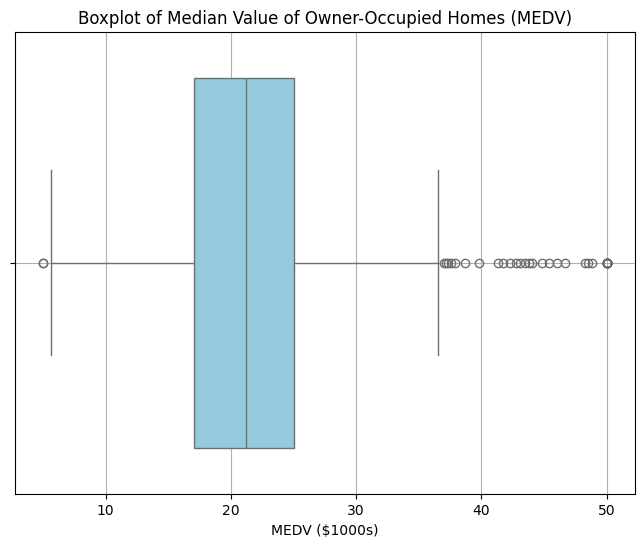

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'], color='skyblue')
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('MEDV ($1000s)')
plt.grid(True)
plt.show()

In [ ]:
b)Provide a  bar plot for the Charles river variable

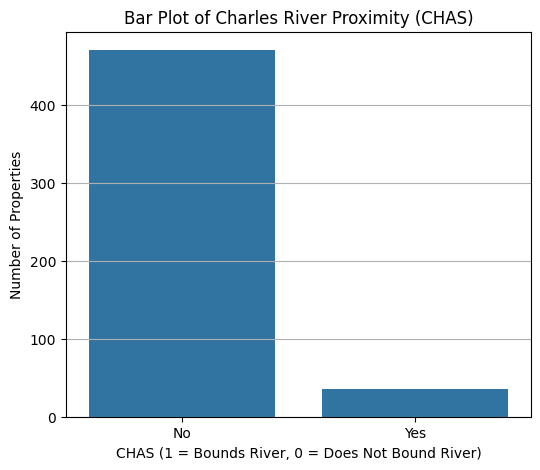

In [12]:
plt.figure(figsize=(6, 5))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot of Charles River Proximity (CHAS)')
plt.xlabel('CHAS (1 = Bounds River, 0 = Does Not Bound River)')
plt.ylabel('Number of Properties')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(axis='y')
plt.show()

In [ ]:
c)Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

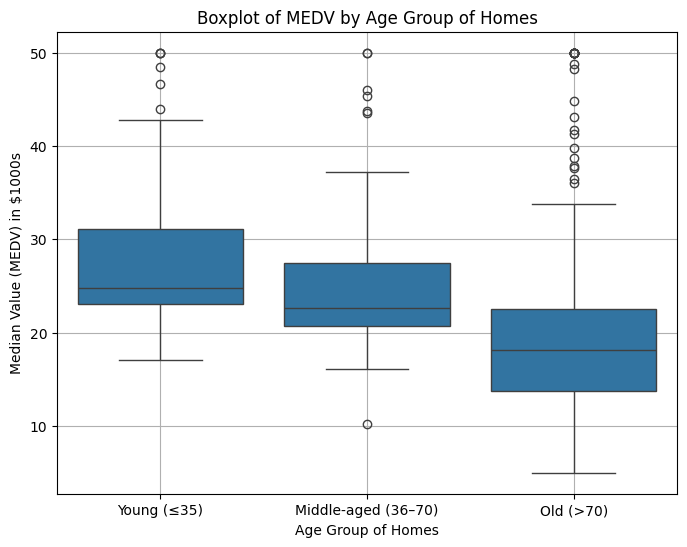

In [14]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'],
                         bins=[0, 35, 70, 100],
                         labels=['Young (≤35)', 'Middle-aged (36–70)', 'Old (>70)'])

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV by Age Group of Homes')
plt.xlabel('Age Group of Homes')
plt.ylabel('Median Value (MEDV) in $1000s')
plt.grid(True)
plt.show()

In [ ]:
d)Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

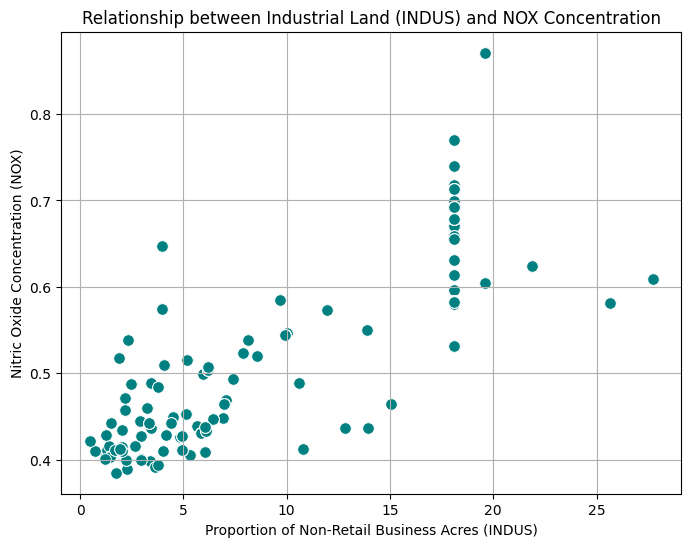

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df, color='teal', edgecolor='w', s=70)
plt.title('Relationship between Industrial Land (INDUS) and NOX Concentration')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.grid(True)
plt.show()

In [ ]:
e)Create a histogram for the pupil to teacher ratio variable

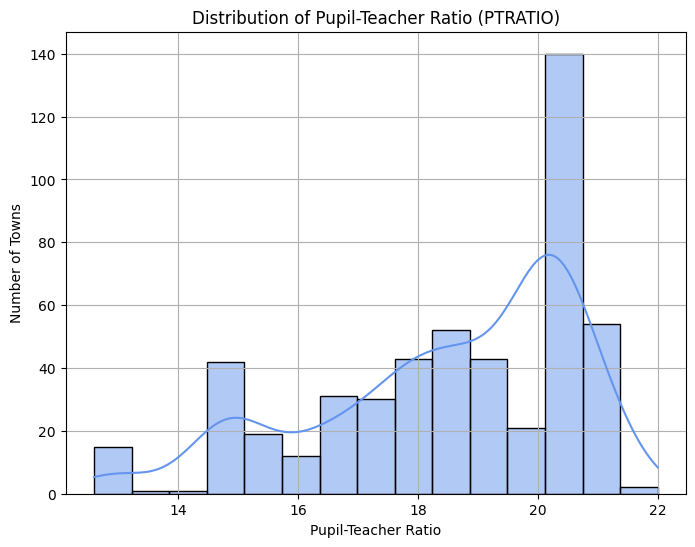

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True, color='cornflowerblue')
plt.title('Distribution of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Number of Towns')
plt.grid(True)
plt.show()

In [ ]:
Task 3: Use the appropriate tests to answer the questions provided

In [ ]:
a) Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [20]:
# Split MEDV values based on CHAS
medv_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_no_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test
scipy.stats.levene(medv_river, medv_no_river, center='median')


LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

In [ ]:
Conclusion: Since P values less then alpha value 0.05 , we rejest null hypothesis

In [ ]:
b)Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [27]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'],
                         bins=[0, 35, 70, 100],
                         labels=['Young (≤35)', 'Middle-aged (36–70)', 'Old (>70)'])

# Get MEDV values per age group
young = boston_df[boston_df['AGE_GROUP'] == 'Young (≤35)']['MEDV']
middle = boston_df[boston_df['AGE_GROUP'] == 'Middle-aged (36–70)']['MEDV']
old = boston_df[boston_df['AGE_GROUP'] == 'Old (>70)']['MEDV']

# Perform one-way ANOVA
scipy.stats.levene(young, middle, old)


LeveneResult(statistic=3.471820890881101, pvalue=0.031806778061338456)

In [ ]:
conclusion :Since P values less then alpha value 0.05 ,we rejest null hypothesis

In [ ]:
c)Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [25]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [ ]:
conclusion :Since P values less then alpha value 0.05 ,we rejest null hypothesis

In [ ]:
d)What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)



In [26]:
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 14 May 2025   Prob (F-statistic):           1.21e-08
Time:                        14:42:58   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [ ]:
Conclusion :Since cost of COEF DIS is 1.0916 we can say that  additional weighted distance to the five Boston employment centres increase of median value 1.0916 owner accopied home.